In [1]:
import csv
import collections
from dateutil.parser import parser
import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
import pandas as pd

In [2]:
with open('turnstile_160507.txt') as f:
    turnstiles1 = pd.read_csv(f)
with open('turnstile_160514.txt') as f:
    turnstiles2 = pd.read_csv(f)
with open('turnstile_160521.txt') as f:
    turnstiles3 = pd.read_csv(f)
with open('turnstile_160528.txt') as f:
    turnstiles4 = pd.read_csv(f)

turnstile_df = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

In [3]:
turnstile_df.columns = turnstile_df.columns.str.strip()
turnstile_df['DATETIME'] = turnstile_df['DATE'] + ' ' + turnstile_df['TIME']
turnstile_df['DATETIME'] = turnstile_df['DATETIME'].apply(parser)


In [4]:
#THIS STEP TAKES FOREVER!!!!!
m =turnstile_df['DATE']

turnstile_df['dayofweek'] = pd.to_datetime(m).dt.dayofweek


In [5]:
test =turnstile_df.groupby(['STATION','LINENAME', 'C/A', 'UNIT', 'SCP'])

In [7]:
turnstile_df['net_in'] = test['ENTRIES'].transform(pd.Series.diff)
turnstile_df['net_out'] = test['EXITS'].transform(pd.Series.diff)

In [8]:
foo = turnstile_df['net_in']
print len(foo[foo>5000])
print len(foo[foo<-5000])

96
105


In [10]:
turnstile_df[turnstile_df['net_in']>5000] = numpy.nan
turnstile_df[turnstile_df['net_in']<-5000] = numpy.nan
turnstile_df['net_in']=numpy.abs(turnstile_df['net_in'])
turnstile_df[turnstile_df['net_out']>5000] = numpy.nan
turnstile_df[turnstile_df['net_out']<-5000] = numpy.nan
turnstile_df['net_out']=numpy.abs(turnstile_df['net_out'])
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,net_in,net_out
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x107170d90>,5.0,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x115a7d350>,5.0,50.0,10.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x115a7d3d0>,5.0,23.0,31.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x115a7d310>,5.0,144.0,110.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x115a7d450>,5.0,296.0,63.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802.0,1910254.0,<dateutil.parser.parser object at 0x115a7d390>,5.0,348.0,57.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974.0,1910328.0,<dateutil.parser.parser object at 0x115a7d750>,6.0,172.0,74.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996.0,1910333.0,<dateutil.parser.parser object at 0x115a7d790>,6.0,22.0,5.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021.0,1910358.0,<dateutil.parser.parser object at 0x115a7d590>,6.0,25.0,25.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113.0,1910427.0,<dateutil.parser.parser object at 0x115a7d5d0>,6.0,92.0,69.0


In [11]:
turnstile_df['net_sum']= turnstile_df['net_in']+ turnstile_df['net_out']

In [12]:
turnstile_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,dayofweek,net_in,net_out,net_sum
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941.0,1909983.0,<dateutil.parser.parser object at 0x107170d90>,5.0,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991.0,1909993.0,<dateutil.parser.parser object at 0x115a7d350>,5.0,50.0,10.0,60.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014.0,1910024.0,<dateutil.parser.parser object at 0x115a7d3d0>,5.0,23.0,31.0,54.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158.0,1910134.0,<dateutil.parser.parser object at 0x115a7d310>,5.0,144.0,110.0,254.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454.0,1910197.0,<dateutil.parser.parser object at 0x115a7d450>,5.0,296.0,63.0,359.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802.0,1910254.0,<dateutil.parser.parser object at 0x115a7d390>,5.0,348.0,57.0,405.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974.0,1910328.0,<dateutil.parser.parser object at 0x115a7d750>,6.0,172.0,74.0,246.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996.0,1910333.0,<dateutil.parser.parser object at 0x115a7d790>,6.0,22.0,5.0,27.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021.0,1910358.0,<dateutil.parser.parser object at 0x115a7d590>,6.0,25.0,25.0,50.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113.0,1910427.0,<dateutil.parser.parser object at 0x115a7d5d0>,6.0,92.0,69.0,161.0


In [13]:
daily_entry = turnstile_df.groupby(['STATION', 'dayofweek'])['net_in'].sum()
daily_exit = turnstile_df.groupby(['STATION', 'dayofweek'])['net_out'].sum()
daily_total = turnstile_df.groupby(['STATION', 'dayofweek'])['net_sum'].sum()

In [14]:
daily_entry = daily_entry.reset_index()
daily_exit = daily_exit.reset_index()
daily_total = daily_total.reset_index()

In [15]:
total_entry = turnstile_df.groupby(['STATION'])['net_in'].sum()
total_exit = turnstile_df.groupby(['STATION'])['net_out'].sum()

In [16]:
total = total_entry.add(total_exit)
summary = pd.concat([total_entry, total_exit, total], axis=1)

In [17]:
summary.columns = ['total_entry', 'total_exit', 'total_traffic']

In [18]:
summary = summary.reset_index()

In [19]:
topten = summary.sort_values(by = ['total_traffic'], ascending = False).head(10)

In [20]:
topstation = list(topten['STATION'])

In [21]:
topstation

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 '86 ST',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 '42 ST-PORT AUTH',
 '125 ST',
 '59 ST']

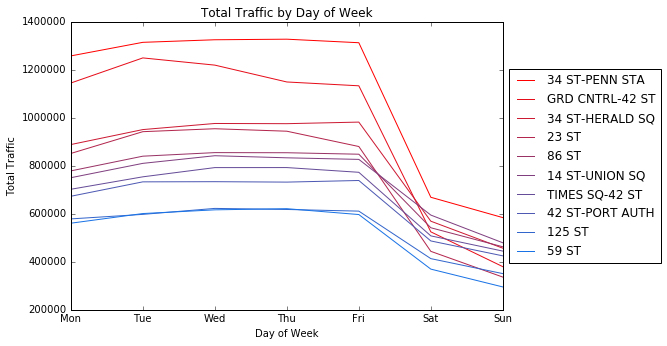

In [55]:
daily_total
clr = numpy.arange(0, 1.1, 0.1)
fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_total = daily_total[daily_total['STATION']==i]
    x = numpy.array(station_total['dayofweek'])
    y = numpy.array(station_total['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = i, color = c)
ax1.set_xlabel('Day of Week')
ax1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by Day of Week')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [24]:
t_en = numpy.array(topten['total_entry'])[::-1]
t = numpy.array(topten['total_traffic'])[::-1]

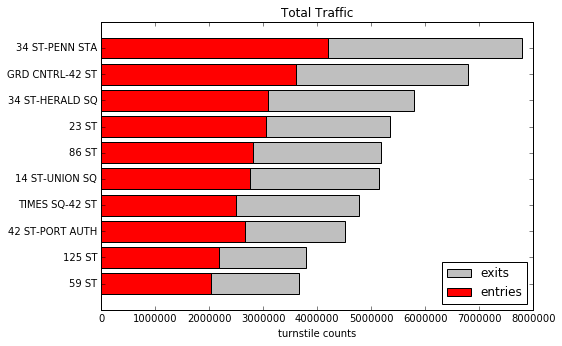

In [25]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0, 0, 1, 1])
ax2.barh(range(0, 10), t, color = '0.75', label = 'exits', align = 'center')
ax2.barh(range(0, 10), t_en, color = 'red', label = 'entries', align = 'center')
ax2.set_yticks(range(0,10))
ax2.set_yticklabels(topstation[::-1])
ax2.set_xlabel('turnstile counts')
plt.ylim(-1, 10)
plt.title('Total Traffic')
plt.legend(loc = 'best');

In [26]:
weekday_data = turnstile_df[turnstile_df['dayofweek']<5]

In [27]:
weekday_data['st2']=weekday_data['STATION']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
weekday_data_to = weekday_data[weekday_data['st2'].isin(topstation)]

In [29]:
m1 = weekday_data_to['STATION']
m2 = weekday_data_to['TIME']
m3 = weekday_data_to['net_sum']

In [30]:
m_new = pd.concat([m1, m2, m3], axis=1)

In [31]:
hslot = []
h= []
for i in m_new['TIME']:
    i = str(i)
    hour = int(i[:2])
    if hour == 0:
        hslot.append(6)
    elif hour > 0 and hour <= 4:
        hslot.append(1)
    elif hour <=8:
        hslot.append(2)
    elif hour <=12:
        hslot.append(3)
    elif hour <=16:
        hslot.append(4)
    elif hour<=20:
        hslot.append(5)
    else:
        hslot.append(6)


[6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 5,
 6,
 1,
 2,
 3,
 4,
 4,
 5,
 6,
 1,


In [32]:
m_new['hslot'] = hslot

In [33]:
stationbyhour = m_new.groupby(['STATION', 'hslot'])['net_sum'].sum()

In [34]:
stationbyhour= stationbyhour.reset_index()

In [35]:
stationbyhour

,STATION,hslot,net_sum
0,125 ST,1,154472.0
1,125 ST,2,203099.0
2,125 ST,3,667414.0
3,125 ST,4,603105.0
4,125 ST,5,841048.0
5,125 ST,6,558893.0
6,14 ST-UNION SQ,1,393277.0
7,14 ST-UNION SQ,2,39440.0
8,14 ST-UNION SQ,3,561001.0
9,14 ST-UNION SQ,4,799110.0


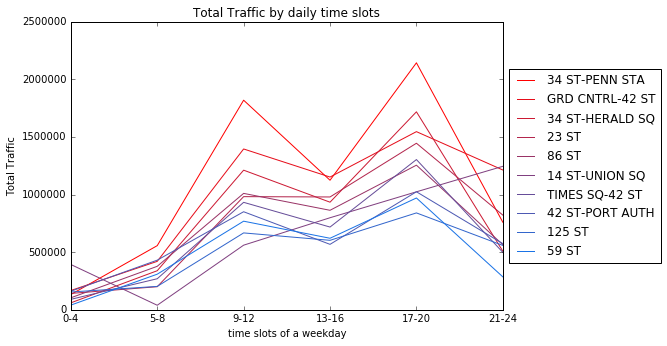

In [52]:
clr = numpy.arange(0, 1.1, 0.1)

fig1 = plt.figure()
ax1 = fig1.add_axes([0, 0, 1, 1])
for i in topstation:
    station_hour = stationbyhour[stationbyhour['STATION']==i]
    x = numpy.array(station_hour['hslot'])
    y = numpy.array(station_hour['net_sum'])
    index = topstation.index(i)
    c = (clr[10-index], clr[index]/2, clr[index], 1)
    ax1.plot(x,y, label = i, color = c)
ax1.set_xlabel('time slots of a weekday')
ax1.set_xticklabels(['0-4', '5-8', '9-12', '13-16', '17-20', '21-24'])
ax1.set_ylabel('Total Traffic')
ax1.set_title('Total Traffic by daily time slots')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));